In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goalzone-fitness-data/ASDS_DatacampFinal_fitness_class_2212_07.13.2023 - fitness_class_2212.csv


**Company Background:**
GoalZone is a fitness club chain in Canada.
GoalZone offers a range of fitness classes in two capacities - 25 and 15.
Some classes are always fully booked. Fully booked classes often have a low attendance rate.
GoalZone wants to increase the number of spaces available for classes.
They want to do this by predicting whether the member will attend the class or not.
If they can predict a member will not attend the class, they can make another space
availab

**Tasks & Company Questions:**
Write your answers in your workspace.
1. For every column in the data:
    a. State whether the values match the description given in the table above.
    b. State the number of missing values in the column.
    c. Describe what you did to make values match the description if they did not match.

2. Create a visualization that shows how many bookings attended the class. Use the
visualization to:
a. State which category of the variable attended has the most observations
b. Explain whether the observations are balanced across categories of the
variable attended

3. Describe the distribution of the number of months as a member. Your answer must
include a visualization that shows the distribution.

4. Describe the relationship between attendance and number of months as a member.
Your answer must include a visualization to demonstrate the relationship.

5. The business wants to predict whether members will attend using the data provided.
State the type of machine learning problem that this is (regression/ classification/
clustering).

6. Fit a baseline model to predict whether members will attend using the data provided.
You must include your code.

7. Fit a comparison model to predict whether members will attend using the data
provided. You must include your code.

8. Explain why you chose the two models used in parts 6 and 7.

9. Compare the performance of the two models used in parts 6 and 7, using any method
suitable. You must include your code.

10. Explain which model performs better and why

**Section 1**

**Loading the necessary libraries and files to begin analysis on the dataset. We will print and view the first 5 rows of the dataset.**

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read data
df = pd.read_csv('/kaggle/input/goalzone-fitness-data/ASDS_DatacampFinal_fitness_class_2212_07.13.2023 - fitness_class_2212.csv')

#Print the number of rows and columns using shape
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

#Quick view of the fist 5 rows of the dataset
df.head()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Number of rows: 1500
Number of columns: 8


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


**Data Validation** The following scripts will address all parts to question one. At the end a summary report will be provided for the question.


In [3]:
#Looking at the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB



We will perform data validation to answer these questions from the assignment:
1. For every column in the data:
    a. State whether the values match the description given in the table above.
    b. State the number of missing values in the column.
    c. Describe what you did to make values match the description if they did not match.

In [4]:
#Let's validate that the category column fits into the categories from the data description in the 
#correspondence

#Value counts of the categories & weekdays
category_counts= df['category'].value_counts()
weekday_counts= df['day_of_week'].value_counts()

#Print results
print("Value Counts:", category_counts)
print("Value Counts:", weekday_counts)


Value Counts: HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
-            13
Name: category, dtype: int64
Value Counts: Fri          279
Thu          241
Mon          218
Sun          213
Sat          202
Tue          195
Wed           81
Wednesday     35
Fri.          26
Monday        10
Name: day_of_week, dtype: int64


In [5]:
#Replacing the string to an NaN value to help removing the missing values
df['category']= df['category'].replace('-', 'Unknown')

#Checking the missing data in the category column
df['category'].isna().sum()

#Confirming value counts of the cateogry columns
df['category'].value_counts()

HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
Unknown      13
Name: category, dtype: int64

In [6]:
#Function to convert the naming conventions of the days of the week
def combine_weekdays(df, day_of_week):
    df['day_of_week']= df['day_of_week'].str.replace('Monday', 'Mon')
    df['day_of_week']= df['day_of_week'].str.replace('Wednesday', 'Wed')
    df['day_of_week']= df['day_of_week'].str.replace('Fri.', 'Fri')
    return df

df = combine_weekdays(df, 'day of the week')

#Print results
print(df['day_of_week'].value_counts())



Fri    305
Thu    241
Mon    228
Sun    213
Sat    202
Tue    195
Wed    116
Name: day_of_week, dtype: int64


/tmp/ipykernel_20/517461217.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['day_of_week']= df['day_of_week'].str.replace('Fri.', 'Fri')


**Category column results:** The category counts are validated to be: HIIT, Cycling, Strength, Yoga & Aqua as described in the data description from the correspondence. The category columns contains 13 missing values represented by a '-', we will first replace the '-' with a "Unknown" value as a place holder. After our manipulation we will use the value counts method to confirm the changes made.

**Day_of_week results: *******The naming conventions within the column is not homogenic. For example, there value for the first day of the week is stored 'Monday' & 'Mon'. They represent the same day but the way the the data was recorded in the table is split the vlues counts into two different categories. We will replace these day_of_the_week with the abbrivated version of the day, example, 'Wednesday" will be converted to 'Wed' to acheive consistency in the data. This will produce more reliable & consistent results.*******

**See the below code for the steps taken to execute the task**

In [7]:
#Check missing data in all the columns
df.isna().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

There are 20 missing values in the weight column. To preserve data and use as many data points as  possible in our analysis, we will impute the average weight to the missing values. See code below:

In [8]:
#Finding the overall mean of the weight column
weight_mean = df['weight'].mean()

#Imputing the mean to the missing values in the weight column
df['weight'].fillna(weight_mean, inplace= True)

#Looking for missing values in the weight column
df.isnull().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

In [9]:
#Looking for abnormal and negative values in the 'days_before' column
min_day= df['days_before'].min()
max_day= df['days_before'].max()

print("Minimum days before the member registered:", min_day)
print("Maximum days before the member registered:", max_day)

Minimum days before the member registered: 1
Maximum days before the member registered: 9


The following cell is intended to ensure that the values in the attended column are accurately recorded as 1 & 0

In [10]:
#Checking vlaues in the attended column
df['attended'].value_counts()

0    1046
1     454
Name: attended, dtype: int64

In [11]:
#Checking the 'time' column to ensure the dat awas recorded as 'AM' and 'PM'
time_stamp= df['time'].value_counts()

print("This is the session of the day: ", time_stamp)

This is the session of the day:  AM    1141
PM     359
Name: time, dtype: int64


**Summary of question 1**
After our data manipulation the data has been cleaned and is now ready for visualization and building the ML model. To ensure that the data fit the description in the table we executed different data techniques on the columns. The following describes the techniques used on the dataset to clean the data, count and impute the missing values.
* Firstly, the .info() was used to look at the data types of the differetn columns
* In the 'category' column, we used the value counts method to verify the counts of the different variables in the column. For the missing values in the column, we imputed the string 'unknown' to the missing values. The were 13 missing values in the column and the missing values were stored as '-'. 
* The day_of_week column had the days recorded in different nomenclature. For example, the first day of the week was store as both 'Monday' and 'Mon', this meant the the same day was now double recorded. To rectify this, we wrote a function using the 'str.replace' method to the change full weekday name to its abbreviated version, example, 'Monday' was 'Mon', 'Wednesday' was stored as 'Wed' etc. Friday was stored both as 'Fri.'(note the punctuation) and 'Fri', the same str.replace technique in the function was used to convert the day to its abbreviated form ('Fri').
* Inspected the 'days_before' column to ensure that the minimum value was 1. It would be impossible to have a negative number for a registration date so we want to ensure that there were no negative values in that column.
* The weight column had twenty missing values, these values were imputed by using the overall mean of the column to preserve data in the dataset. The more data we can have in the dataset the nome accuracy we can generate in our model. In addition, the values in the column are a float data type rounded to two decimal places.
* The attended column was inspected to ensure that the values in the column was either 1(attended the class) or 0(did not attend the class). No missing values were found in the column
* No change were made to the 'time' column. Data was recorded accurately in the table


****

**Section 2**

**Data Visualization**

In [12]:
#Viewing the dataset
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


We are going to look at the distribution of attendace within the dataset. We filter the 'attended' column to show only calsses that were attended, i.e that the variable in the attended column was equal to 1

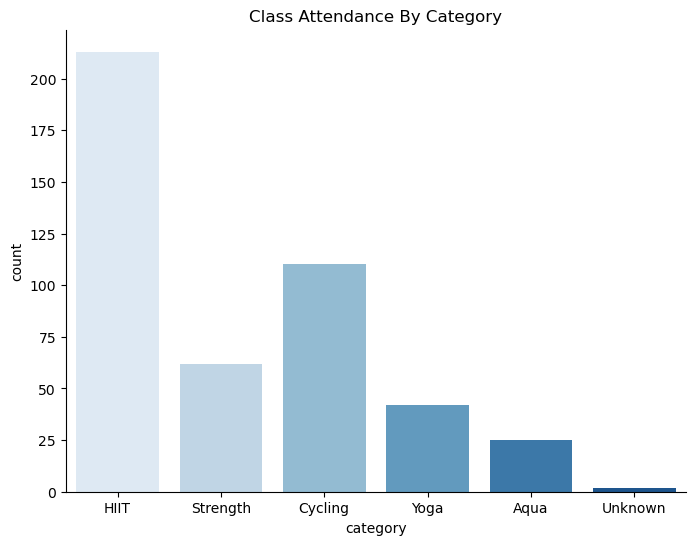

In [13]:
#Filter the dataset 
attendance= df[df['attended'] == 1]

#Create a countplot of class attendance by category
plt.figure(figsize=(8,6))
sns.countplot(data=attendance, x= 'category', palette= 'Blues')
sns.despine()
plt.title("Class Attendance By Category")
plt.show()

